In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
import csv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import cv2

In [2]:
train_file = 'global-wheat-detection/train.csv'
train_csv = pd.read_csv(train_file)

In [3]:
train_folder = 'global-wheat-detection/train/'

In [4]:
bboxes = {}
for i, image_id in enumerate(train_csv['image_id']):
    bbox = train_csv['bbox'][i][1:-1]
    bbox = bbox.split(',')
    xmin = float(bbox[0])
    ymin = float(bbox[1])
    width = float(bbox[2])
    height = float(bbox[3])
    
    if image_id not in bboxes:
        bboxes[image_id] = []
        bboxes[image_id].append([xmin, ymin, width, height])
    else:
        bboxes[image_id].append([xmin, ymin, width, height])

In [61]:
def rescale_image(image, bboxes, factor):
    '''
        image : image_path that needs to be rescaled
        bboxes : list of bounding boxes for that image
        factor : rescaling factor, preferably an integer. We scale both dimensions equally
    '''
    
    img = cv2.imread(image)
    x_size = im.shape[0]
    y_size = im.shape[1]

    resized_image = cv2.resize(img, dsize=( int(x_size / factor), int(y_size / factor)), interpolation=cv2.INTER_CUBIC)
    
    fig,ax = plt.subplots(1)
    fig.set_size_inches(15, 10)
    ax.imshow(resized_image)
    
    new_bboxes = []
    for xmin, ymin, width, height in bboxes:
        rect = patches.Rectangle( (int(xmin/factor) ,int(ymin/factor)), int(width/factor), int(height/factor), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        new_bboxes.append([int(xmin/factor) ,int(ymin/factor), int(width/factor), int(height/factor)])
        
    return resized_image, new_bboxes
        
    
    

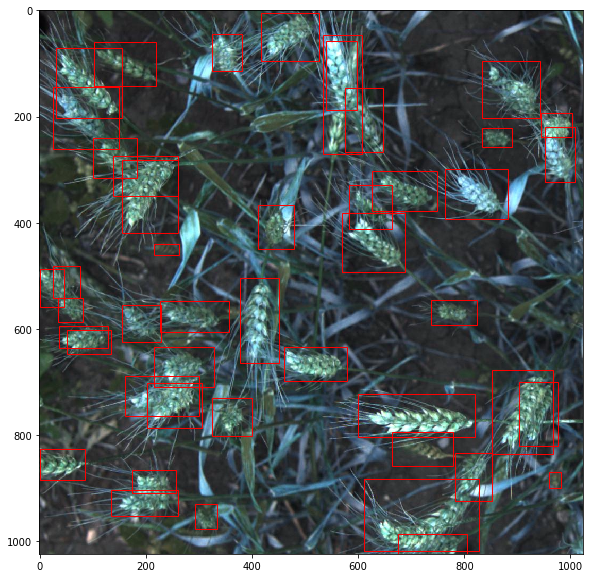

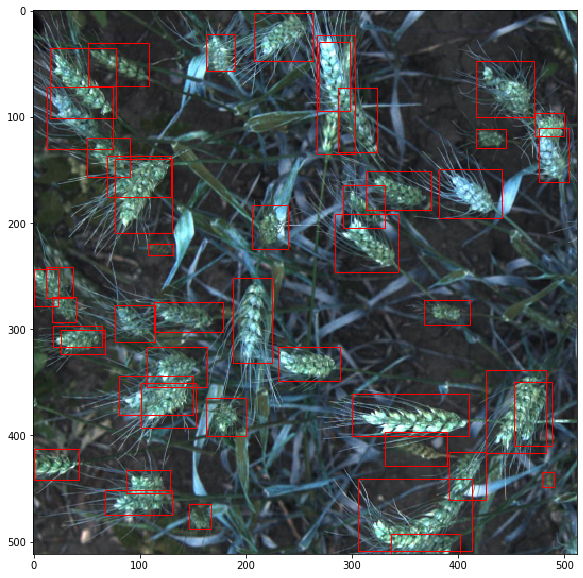

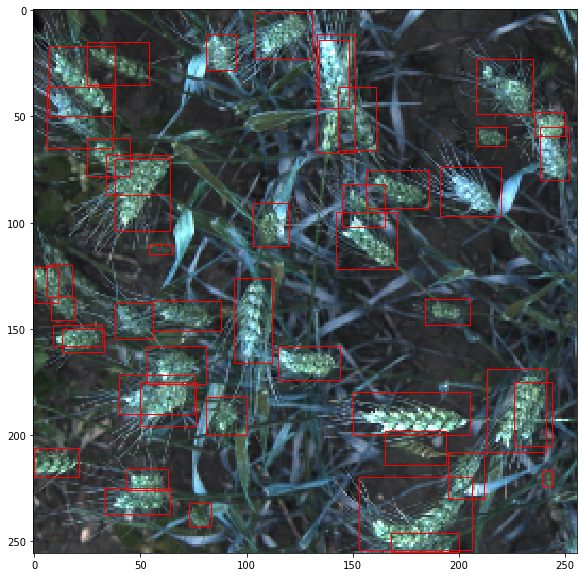

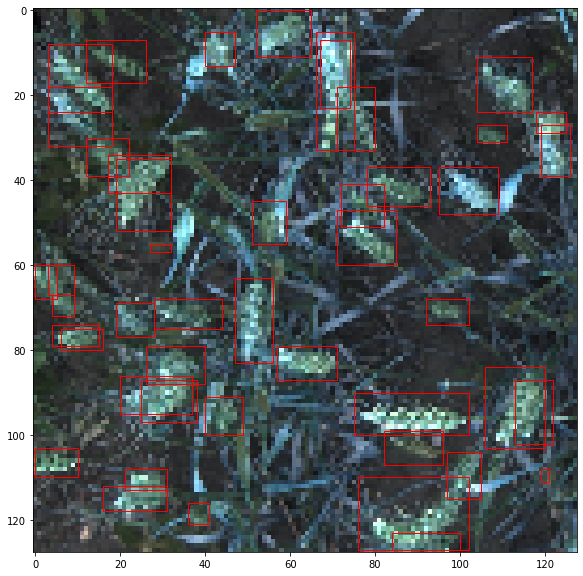

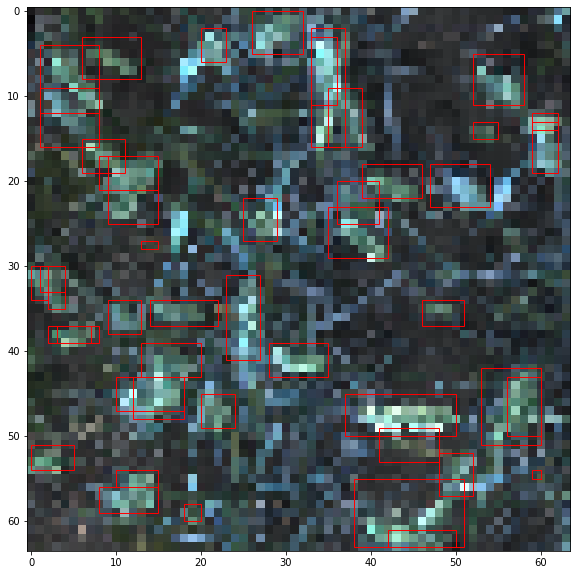

In [62]:
for i, image_id in enumerate(bboxes):
    image_path = train_folder + image_id + '.jpg'
    
    rescale_image(image_path, bboxes[image_id], 1)
    rescale_image(image_path, bboxes[image_id], 2)
    rescale_image(image_path, bboxes[image_id], 4)
    rescale_image(image_path, bboxes[image_id], 8)
    rescale_image(image_path, bboxes[image_id], 16)
        
    break